This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) #random noise added to data

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit( #noisy data set
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
# It's common to do feature selection before training

Epoch 1/10
375/375 [==============================] - 7s 7ms/step - loss: 0.6353 - accuracy: 0.8067 - val_loss: 0.3930 - val_accuracy: 0.8636
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2483 - accuracy: 0.9222 - val_loss: 0.1735 - val_accuracy: 0.9501
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1614 - accuracy: 0.9499 - val_loss: 0.1502 - val_accuracy: 0.9536
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1147 - accuracy: 0.9639 - val_loss: 0.1332 - val_accuracy: 0.9620
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0840 - accuracy: 0.9734 - val_loss: 0.1228 - val_accuracy: 0.9636
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.1200 - val_accuracy: 0.9681
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.1137 - val_accuracy: 0.9692
Epoch 

In [ ]:
model = get_model()
history1 = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.2879 - accuracy: 0.9168 - val_loss: 0.1609 - val_accuracy: 0.9551
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1178 - accuracy: 0.9650 - val_loss: 0.1132 - val_accuracy: 0.9678
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9774 - val_loss: 0.1033 - val_accuracy: 0.9689
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0548 - accuracy: 0.9841 - val_loss: 0.0824 - val_accuracy: 0.9758
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0797 - val_accuracy: 0.9784
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0308 - accuracy: 0.9909 - val_loss: 0.0848 - val_accuracy: 0.9758
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0795 - val_accuracy: 0.9775
Epoch 

**Plotting a validation accuracy comparison**

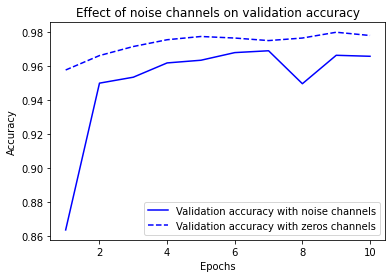

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

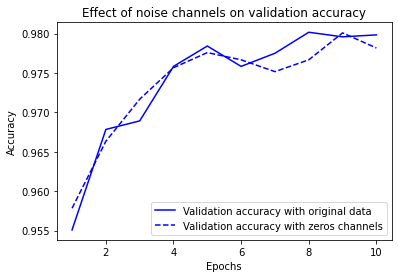

In [ ]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3167 - accuracy: 0.1028 - val_loss: 2.3094 - val_accuracy: 0.1028
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2991 - accuracy: 0.1181 - val_loss: 2.3147 - val_accuracy: 0.1018
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2903 - accuracy: 0.1293 - val_loss: 2.3132 - val_accuracy: 0.1015
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2766 - accuracy: 0.1423 - val_loss: 2.3298 - val_accuracy: 0.1016
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2607 - accuracy: 0.1530 - val_loss: 2.3445 - val_accuracy: 0.1019
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2397 - accuracy: 0.1671 - val_loss: 2.3497 - val_accuracy: 0.1006
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2177 - accuracy: 0.1827 - val_loss: 2.3662 - val_accuracy: 0.1034

In [ ]:
#accuracy 는 계속 오르지만 val_accuracy 는 10%

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # check gradient descend parameters
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 871.1930 - accuracy: 0.3580 - val_loss: 2.2660 - val_accuracy: 0.2496
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 5.6861 - accuracy: 0.2543 - val_loss: 9.2140 - val_accuracy: 0.2734
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 4.3018 - accuracy: 0.2523 - val_loss: 3.0623 - val_accuracy: 0.2133
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.7485 - accuracy: 0.2301 - val_loss: 2.0918 - val_accuracy: 0.2550
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8873 - accuracy: 0.2368 - val_loss: 2.0762 - val_accuracy: 0.2042
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 3.0268 - accuracy: 0.2245 - val_loss: 2.3112 - val_accuracy: 0.2465
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6369 - accuracy: 0.2539 - val_loss: 2.2312 - val_accuracy: 0.2285
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #appropriate learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3620 - accuracy: 0.9101 - val_loss: 0.1569 - val_accuracy: 0.9578
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1406 - accuracy: 0.9634 - val_loss: 0.1707 - val_accuracy: 0.9654
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1228 - accuracy: 0.9720 - val_loss: 0.1505 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1074 - accuracy: 0.9776 - val_loss: 0.1559 - val_accuracy: 0.9717
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9820 - val_loss: 0.2293 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0841 - accuracy: 0.9841 - val_loss: 0.2012 - val_accuracy: 0.9753
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0727 - accuracy: 0.9862 - val_loss: 0.2391 - val_accuracy: 0.9739
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6612 - accuracy: 0.8382 - val_loss: 0.3583 - val_accuracy: 0.9016
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3510 - accuracy: 0.9034 - val_loss: 0.3071 - val_accuracy: 0.9153
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.9121 - val_loss: 0.2898 - val_accuracy: 0.9210
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2994 - accuracy: 0.9161 - val_loss: 0.2799 - val_accuracy: 0.9223
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2897 - accuracy: 0.9188 - val_loss: 0.2777 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9210 - val_loss: 0.2714 - val_accuracy: 0.9257
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2783 - accuracy: 0.9225 - val_loss: 0.2703 - val_accuracy: 0.9255
Epoch 

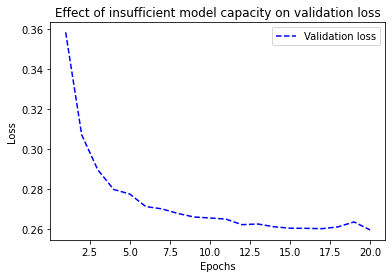

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3561 - accuracy: 0.8986 - val_loss: 0.1874 - val_accuracy: 0.9458
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1606 - accuracy: 0.9521 - val_loss: 0.1367 - val_accuracy: 0.9597
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1134 - accuracy: 0.9664 - val_loss: 0.1132 - val_accuracy: 0.9668
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0877 - accuracy: 0.9733 - val_loss: 0.1060 - val_accuracy: 0.9695
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0707 - accuracy: 0.9793 - val_loss: 0.0962 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9815 - val_loss: 0.0925 - val_accuracy: 0.9742
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.1019 - val_accuracy: 0.9709
Epoch 

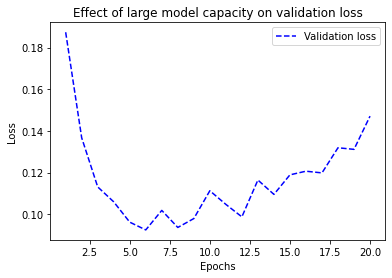

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 41ms/step - loss: 0.5159 - accuracy: 0.7832 - val_loss: 0.3860 - val_accuracy: 0.8782
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3096 - accuracy: 0.9055 - val_loss: 0.3053 - val_accuracy: 0.8911
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2250 - accuracy: 0.9287 - val_loss: 0.2801 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1753 - accuracy: 0.9437 - val_loss: 0.2793 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1439 - accuracy: 0.9549 - val_loss: 0.2808 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1190 - accuracy: 0.9637 - val_loss: 0.2926 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1020 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6215 - accuracy: 0.6465 - val_loss: 0.5727 - val_accuracy: 0.8238
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5347 - accuracy: 0.8048 - val_loss: 0.5224 - val_accuracy: 0.8369
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4871 - accuracy: 0.8529 - val_loss: 0.4934 - val_accuracy: 0.8520
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4529 - accuracy: 0.8829 - val_loss: 0.4740 - val_accuracy: 0.8657
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4265 - accuracy: 0.9073 - val_loss: 0.4741 - val_accuracy: 0.8280
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4047 - accuracy: 0.9215 - val_loss: 0.4542 - val_accuracy: 0.8616
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3861 - accuracy: 0.9341 - val_loss: 0.4532 - val_accuracy: 0.8563
Epoch 8/20
30

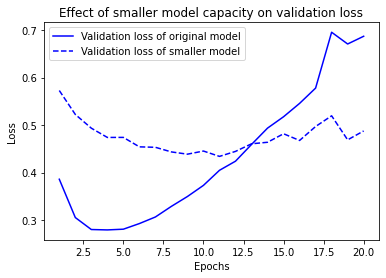

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5405 - accuracy: 0.7631 - val_loss: 0.3963 - val_accuracy: 0.8277
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2593 - accuracy: 0.8991 - val_loss: 0.3105 - val_accuracy: 0.8684
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1697 - accuracy: 0.9369 - val_loss: 0.2753 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 0.3736 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1189 - accuracy: 0.9769 - val_loss: 0.3647 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.5068 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 7.7828e-04 - accuracy: 0.9999 - val_loss: 0.6326 - val_accuracy: 0.8850
Epoch 8/2

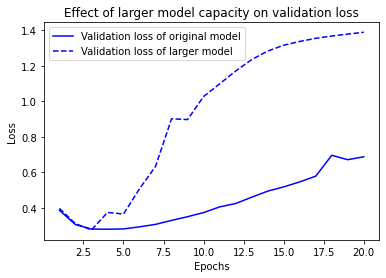

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5997 - accuracy: 0.7879 - val_loss: 0.4695 - val_accuracy: 0.8789
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4046 - accuracy: 0.8972 - val_loss: 0.3909 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3386 - accuracy: 0.9135 - val_loss: 0.3733 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2990 - accuracy: 0.9255 - val_loss: 0.3542 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2820 - accuracy: 0.9299 - val_loss: 0.3961 - val_accuracy: 0.8682
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2652 - accuracy: 0.9374 - val_loss: 0.3559 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2568 - accuracy: 0.9390 - val_loss: 0.3652 - val_accuracy: 0.8828
Epoch 8/20
30

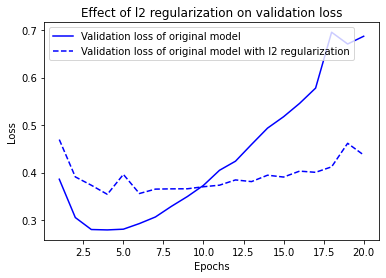

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of original model with l2 regularization")
plt.title("Effect of l2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6452 - accuracy: 0.6159 - val_loss: 0.5571 - val_accuracy: 0.8011
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5314 - accuracy: 0.7530 - val_loss: 0.4450 - val_accuracy: 0.8593
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4465 - accuracy: 0.8203 - val_loss: 0.3763 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3914 - accuracy: 0.8543 - val_loss: 0.3316 - val_accuracy: 0.8776
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3408 - accuracy: 0.8824 - val_loss: 0.3041 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2993 - accuracy: 0.9031 - val_loss: 0.2932 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2589 - accuracy: 0.9169 - val_loss: 0.2794 - val_accuracy: 0.8867
Epoch 8/20
30

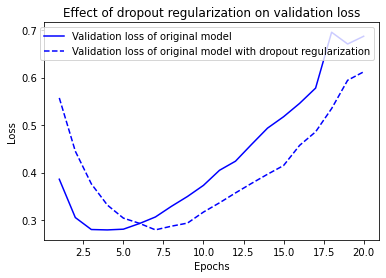

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b--",
         label="Validation loss of original model with dropout regularization")
plt.title("Effect of dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary